# Question 1

In [322]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns


In [323]:
df = pd.read_csv("mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [324]:
df = df.dropna()
df = df.drop(['name'], axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


a. There are 3 distinct values in “Origin” attribute. Convert those values into 2
categories as USA and Non-USA

In [325]:
df['Origin_class'] = df['origin'].apply(lambda x: int(1) if x==1 else int(0))
# df['Origin_class'] = df['origin'].apply(lambda x: "USA" if x==1 else "Non-USA")
df = df.drop(['origin'], axis=1)

In [326]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Origin_class
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [327]:
df = df.dropna()
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
model = LogisticRegression(C=0.1, solver='lbfgs')

In [328]:
df = df.dropna()

In [329]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
Origin_class    0
dtype: int64


In [330]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Origin_class", axis=1), df["Origin_class"], test_size=0.25, random_state=0)

In [331]:
x_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
144,31.0,4,76.0,52.0,1649,16.5,74
247,39.4,4,85.0,70.0,2070,18.6,78
90,12.0,8,429.0,198.0,4952,11.5,73
172,25.0,4,90.0,71.0,2223,16.5,75
21,24.0,4,107.0,90.0,2430,14.5,70


In [332]:
y_train.head()

144    0
247    0
90     1
172    0
21     0
Name: Origin_class, dtype: int64

In [333]:
model.fit(x_train, y_train)

/home/midhun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1)

In [334]:
model = LogisticRegression

c. Vary C = 0.001, 0.01, 0.1, 1, 10,100 and plot a graph for the cost function J(ϴ) of
Logistic regression for the training dataset

In [335]:
cost_values = []
for c in Cs:
    model = LogisticRegression(C=c, solver='lbfgs', max_iter=1000)
    model.fit(x_train, y_train)
    cost_values.append(model.coef_.ravel())

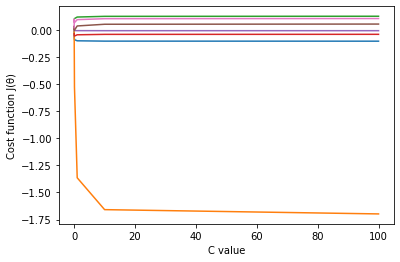

In [336]:
plt.plot(Cs, cost_values)
plt.xlabel("C value")
plt.ylabel("Cost function J(θ)")
plt.show()


d. Predict the target feature for the test dataset

In [337]:
y_pred = model.predict(x_test)

In [338]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

e. Plot the confusion matrix

In [339]:
confusion_matrix(y_test, y_pred)

array([[34,  5],
       [ 6, 53]])

# Question 2

In [340]:
model = LogisticRegression(multi_class='ovr', C=0.1)

In [344]:
model.fit(x_train, y_train)
yhat = model.predict(x_train, y_train)
yhat = model.predict(X)

/home/midhun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


TypeError: predict() takes 2 positional arguments but 3 were given

In [346]:
# define model
model = LogisticRegression(multi_class='ovr', C=0.1,max_iter=1000)

# fit model
model.fit(x_train, y_train)

# make predictions
yhat = model.predict(x_test)

In [347]:

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8877551020408163


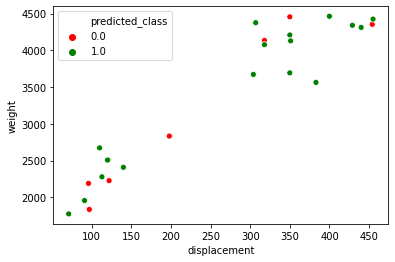

In [349]:
df_pred = pd.DataFrame({'predicted_class': y_pred})
df_test = pd.concat([x_test, df_pred], axis=1)
sns.scatterplot(x='displacement', y='weight', hue='predicted_class', data=df_test, palette=['red', 'green'])
plt.show()


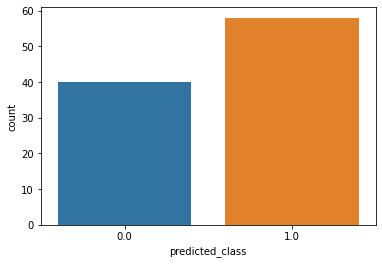

In [350]:
df_pred = pd.DataFrame({'predicted_class': y_pred})
df_test = pd.concat([x_test, df_pred], axis=1)
sns.countplot(x='predicted_class', data=df_test)
plt.show()